### Get the scale of incoming velocity

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg
import xarray as xr
import matplotlib.gridspec as gspec

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [4]:
gridAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/gridGlob.nc')
stAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/stateGlob.nc')
stARGO = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/03_Ast03_Argo/stateGlob.nc')
stAst2 = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF3_AST/01_Ast03/stateGlob.nc')
stARGO2 = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF3_AST/03_Ast03_Argo/stateGlob.nc')
stKV1 = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_KV3D_AST/01_eps5_kv1E-2/stateGlob.nc')
stKV2 = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_KV3D_AST/02_eps25_kv1E-2/stateGlob.nc')

gridBar = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF4_BAR/01_Bar03/gridGlob.nc')
stBar = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF4_BAR/01_Bar03/stateGlob.nc')
stPath = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF4_BAR/03_Bar03_Path/stateGlob.nc')
stBar2 = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF5_BAR/01_Bar03/stateGlob.nc')
stPath2 = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF5_BAR/03_Bar03_Path/stateGlob.nc')

gridCny = xr.open_dataset('/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
stCny = xr.open_dataset('/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc')


Text(0.5,1,'Original, advective phase mean')

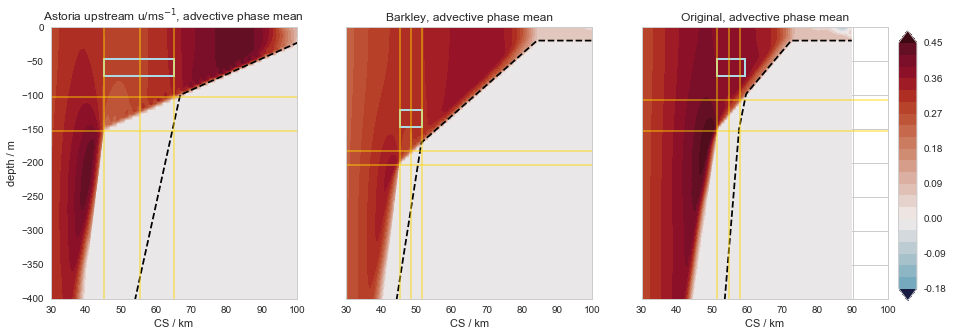

In [6]:
xind = 100
yslice = slice(0,360)
tslice = slice(8,20)
    
UAst = (stAst.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
UBar = (stBar.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
UCny = (stCny.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')

fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                    cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
ax0.set_ylabel('depth / m')
ax0.set_xlabel('CS / km')
ax0.axvline(gridAst.Y[230]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[182]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[130]/1000,color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[30],color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[20],color='gold',alpha=0.5)
cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')
rect = pat.Rectangle((gridAst.Y[130]/1000,gridAst.RC[14]),
                     (gridAst.Y[230]-gridAst.Y[130])/1000,
                     -(gridAst.RC[19]-gridAst.RC[14]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax0.add_patch(rect)

ax1.contourf(gridBar.Y[yslice]/1000, gridBar.RC, UBar,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
ax1.plot(gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,180],'k--')
ax1.set_xlabel('CS / km')
ax1.axvline(gridBar.Y[160]/1000,color='gold',alpha=0.5)
ax1.axvline(gridBar.Y[145]/1000,color='gold',alpha=0.5)
ax1.axvline(gridBar.Y[130]/1000,color='gold',alpha=0.5)
ax1.axhline(gridBar.RC[40],color='gold',alpha=0.5)
ax1.axhline(gridBar.RC[36],color='gold',alpha=0.5)

rect = pat.Rectangle((gridBar.Y[130]/1000,gridBar.RC[29]),
                     (gridBar.Y[160]-gridBar.Y[130])/1000,
                     -(gridBar.RC[34]-gridBar.RC[29]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax1.add_patch(rect)

ax2.contourf(gridCny.Y[yslice]/1000, gridCny.RC, UCny,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
ax2.plot(gridCny.Y[yslice]/1000, -gridCny.Depth[yslice,180],'k--')
ax2.set_xlabel('CS / km')
ax2.axvline(gridCny.Y[225]/1000,color='gold',alpha=0.5)
ax2.axvline(gridCny.Y[245]/1000,color='gold',alpha=0.5)
ax2.axvline(gridCny.Y[260]/1000,color='gold',alpha=0.5)
ax2.axhline(gridCny.RC[30],color='gold',alpha=0.5)
ax2.axhline(gridCny.RC[21],color='gold',alpha=0.5)
rect = pat.Rectangle((gridCny.Y[225]/1000,gridCny.RC[14]),
                     (gridCny.Y[267]-gridCny.Y[225])/1000,
                     (-(gridCny.RC[19]-gridCny.RC[14])),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax2.add_patch(rect)

ax0.set_ylim(-400,0) 
ax0.set_xlim(30,100) 
ax1.set_xlim(30,100) 
ax2.set_xlim(30,100) 

ax0.set_title('Astoria upstream u/ms$^{-1}$, advective phase mean' )
ax1.set_title('Barkley, advective phase mean')
ax2.set_title('Original, advective phase mean' )

In [7]:
xind = 80

yslice_A = slice(130,230)
zslice_A = slice(14,19)

yslice_B = slice(130,160)
zslice_B = slice(29,34)

yslice_C = slice(225,260)
zslice_C = slice(14,19)


names = ['Ast', 'Argo','Ast2', 'Argo2','KV1','KV2','Bar','Path','Bar2','Path2']    
UAst = ((stAst.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UARGO = ((stARGO.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UAst2 = ((stAst2.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UARGO2 = ((stARGO2.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')

UKV1 = ((stKV1.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UKV2 = ((stKV2.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UBar = ((stBar.U.isel(Z=zslice_B,Xp1=xind,Y=yslice_B)).mean(dim='Z')).mean(dim='Y')
UPath = ((stPath.U.isel(Z=zslice_B,Xp1=xind,Y=yslice_B)).mean(dim='Z')).mean(dim='Y')
UBar2 = ((stBar2.U.isel(Z=zslice_B,Xp1=xind,Y=yslice_B)).mean(dim='Z')).mean(dim='Y')
UPath2 = ((stPath2.U.isel(Z=zslice_B,Xp1=xind,Y=yslice_B)).mean(dim='Z')).mean(dim='Y')

Ast : 0.300 $\pm$ 0.002 ms$^-1$ 
Argo : 0.329 $\pm$ 0.004 ms$^-1$ 
Ast2 : 0.442 $\pm$ 0.019 ms$^-1$ 
Argo2 : 0.465 $\pm$ 0.022 ms$^-1$ 
KV1 : 0.269 $\pm$ 0.012 ms$^-1$ 
KV2 : 0.268 $\pm$ 0.012 ms$^-1$ 
Bar : 0.300 $\pm$ 0.001 ms$^-1$ 
Path : 0.288 $\pm$ 0.004 ms$^-1$ 
Bar2 : 0.516 $\pm$ 0.038 ms$^-1$ 
Path2 : 0.495 $\pm$ 0.031 ms$^-1$ 


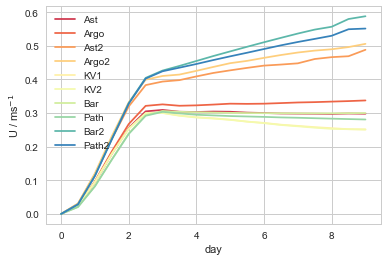

In [9]:
fig, (ax0) = plt.subplots(1,1, figsize=(6,4))
sns.set_palette('Spectral',10)
ax0.plot(np.arange(19)/2.,UAst, label='Ast')
ax0.plot(np.arange(19)/2.,UARGO, label='Argo')
ax0.plot(np.arange(19)/2.,UAst2, label='Ast2')
ax0.plot(np.arange(19)/2.,UARGO2, label='Argo2')
ax0.plot(np.arange(19)/2.,UKV1, label='KV1')
ax0.plot(np.arange(19)/2.,UKV2, label='KV2')
ax0.plot(np.arange(19)/2.,UBar, label='Bar')
ax0.plot(np.arange(19)/2.,UPath, label='Path')
ax0.plot(np.arange(19)/2.,UBar2, label='Bar2')
ax0.plot(np.arange(19)/2.,UPath2, label='Path2')

ax0.set_ylabel( 'U / ms$^{-1}$')
ax0.set_xlabel('day')
ax0.legend(loc=0)


for U, name in zip([UAst[8:18],UARGO[8:18],UAst2[8:18],UARGO2[8:18],UKV1[8:18],
                    UKV2[8:18],UBar[8:18],UPath[8:18],UBar2[8:18],UPath2[8:18]], names):
    u_mean = np.mean(U)
    u_std = np.std(U)
    print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$ ' % (name, u_mean, u_std))

<xarray.DataArray 'RC' ()>
array(-97.5)
Coordinates:
    Z        float64 -97.5
Attributes:
    description: R coordinate of cell center
    units: m
<xarray.DataArray 'RC' ()>
array(-172.5)
Coordinates:
    Z        float64 -172.5
Attributes:
    description: R coordinate of cell center
    units: m


Text(0.5,1,'Barkley, advective phase mean')

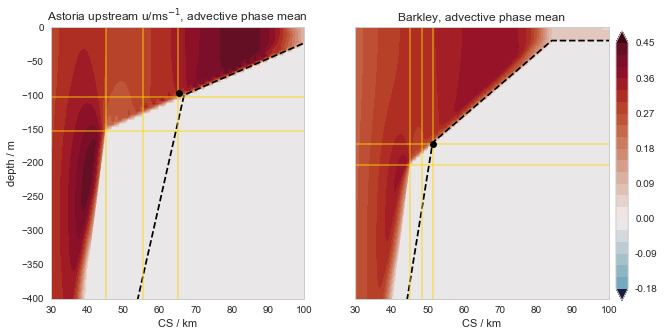

In [16]:
xind = 100
yslice = slice(0,360)
tslice = slice(8,20)
    
UAst = (stAst.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
UBar = (stBar.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
UCny = (stCny.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
    
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,5), sharey = True)

mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                    cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
ax0.set_ylabel('depth / m')
ax0.set_xlabel('CS / km')
ax0.axvline(gridAst.Y[230]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[182]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[130]/1000,color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[30],color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[20],color='gold',alpha=0.5)
cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

ax0.plot(gridAst.Y[232]/1000,gridAst.RC[19],'ko')

print(gridAst.RC[19])

ax1.contourf(gridBar.Y[yslice]/1000, gridBar.RC, UBar,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
ax1.plot(gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,180],'k--')
ax1.set_xlabel('CS / km')
ax1.axvline(gridBar.Y[160]/1000,color='gold',alpha=0.5)
ax1.axvline(gridBar.Y[145]/1000,color='gold',alpha=0.5)
ax1.axvline(gridBar.Y[130]/1000,color='gold',alpha=0.5)
ax1.axhline(gridBar.RC[40],color='gold',alpha=0.5)
ax1.axhline(gridBar.RC[34],color='gold',alpha=0.5)

ax1.plot(gridAst.Y[160]/1000,gridAst.RC[34],'ko')
print(gridAst.RC[34])


ax0.set_ylim(-400,0) 
ax0.set_xlim(30,100) 
ax1.set_xlim(30,100) 

ax0.set_title('Astoria upstream u/ms$^{-1}$, advective phase mean' )
ax1.set_title('Barkley, advective phase mean')
